In [81]:
#Importar librerias

import csv
import psycopg2 as pg
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import time


from scipy import stats
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


#READ THE FILE

def readFile (fileName):  
    df= pd.read_csv(fileName)    
    return df


def avgEPS (rV):
    dffs = [abs(rV[i]-rV[i+1]) for i in range(len(rV)-1)]
    if len(dffs) > 0:
        return np.mean(dffs)
    else :
        return rV[0]
    
def fitLabels (l, t):
    unique = reduce(lambda l, x: l if x in l else l+[x], l, [])
    if t == 0:
        factor = 1
    elif t== 1:
        factor = 6
    for i in range (0, len(l)):
        for j in range (0, len(unique)):
            if l[i]==unique[j]:
                l[i]=j+factor
                break
    return l
        
def graficar (stdList, labels):
    
    colores=['black','green','blue','cyan','yellow']
    asignar=[]
    for row in labels:
        asignar.append(colores[row-1])
    
    plt.scatter(stdList[:, 0], stdList[:, 1], c=asignar,s=60)
    plt.show()

def graficar3D (stdList, labels):
    colores=['red','green','blue','cyan','yellow']
    asignar=[]
    for row in labels:
        asignar.append(colores[row-1])
        
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(stdList[:, 0], stdList[:, 1], stdList[:, 2], c=asignar,s=60)
    plt.show()
    

#Leer archivo
dfFile = readFile(r"C:/Users/L03054037/Desktop/Xab_180830B.csv")
#Pasar datos a un arreglo
datosF = np.array(dfFile[['ID','Age','Gender','Edu','Ocu','ResArea','EdoSocio','WEIGHT','BMI ','OBESITY','SMOK','T2DIAB','ET DIAB','HBA1','2HBA1','1BUN','NEPDIAN','DR','HYPO','TXINS']])

#print (datosF)


#stdDatosF = StandardScaler().fit_transform(datosF)

In [82]:
print (datosF)

[[  1.  68.   2. ...   0.   0.   0.]
 [  2.  68.   1. ...   0.   0.   0.]
 [  3.  18.   2. ...   0.   0.   0.]
 ...
 [708.  87.   1. ...   0.   0.   0.]
 [709.  88.   2. ...   0.   0.   1.]
 [710.  90.   2. ...   0.   0.   0.]]


In [83]:
stdDatosF = StandardScaler().fit_transform(datosF)

In [84]:
print (stdDatosF)

[[-1.72961301  0.92843839  1.23559313 ... -0.3588535  -0.26927227
  -0.45775543]
 [-1.72473399  0.92843839 -0.8093279  ... -0.3588535  -0.26927227
  -0.45775543]
 [-1.71985497 -2.20073306  1.23559313 ... -0.3588535  -0.26927227
  -0.45775543]
 ...
 [ 1.71985497  2.11752354 -0.8093279  ... -0.3588535  -0.26927227
  -0.45775543]
 [ 1.72473399  2.18010697  1.23559313 ... -0.3588535  -0.26927227
   2.18457266]
 [ 1.72961301  2.30527383  1.23559313 ... -0.3588535  -0.26927227
  -0.45775543]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 

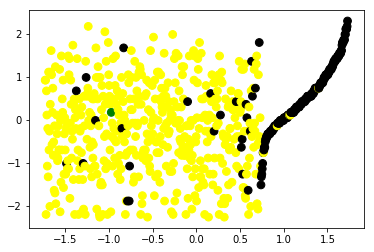

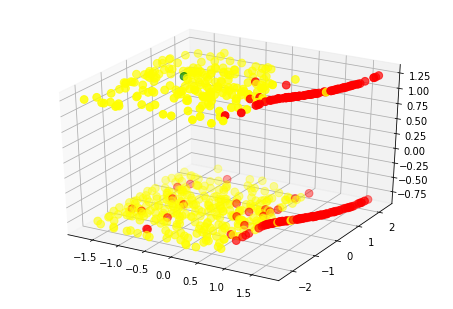

In [85]:
# Compute AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity= "euclidean")
model.fit(stdDatosF)
traininglabels = model.labels_
print (traininglabels)
    
        #obtenemos las etiquetas despues del entrenamiento
labels = fitLabels(model.fit_predict(stdDatosF), 0)
labels = model.fit_predict(stdDatosF)
#print ('Clusters ')
#print (labels)
        
print ('The Silhouette Coefficient is: %s' % silhouette_score(stdDatosF, labels, metric='euclidean'))
graficar(stdDatosF,labels)
graficar3D(stdDatosF,labels)

[0 0 0 2 0 2 2 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 0 2 2 0 0 0 2 0 2 0
 0 2 0 2 2 0 2 0 2 0 2 0 0 2 0 0 0 2 2 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 1 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 2 0 0 0
 2 2 0 0 0 0 0 1 0 0 2 2 2 2 2 0 2 2 0 2 2 0 0 0 0 0 2 0 0 2 2 0 2 0 0 0 0
 2 2 0 2 2 0 2 2 0 0 2 0 1 2 0 2 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 0 0 2 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0
 2 0 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 2 0 0 2 2 2 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 2 2 0 0 2 0 0 2 0 0 0 2 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 2 2 2 0
 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 2 0 2 0 0 2 0 2 2 2 0 0 0 0 0 0
 2 0 0 0 2 0 0 2 0 0 2 0 2 2 0 0 0 0 2 1 2 2 0 0 0 0 0 1 2 2 0 0 2 2 0 0 0
 0 2 0 1 0 0 0 2 0 0 0 0 

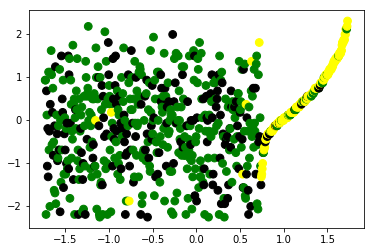

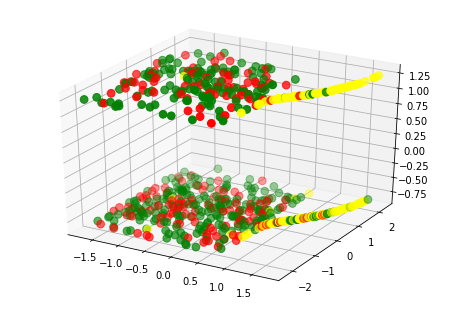

In [86]:
# Compute kmeans
modelK = KMeans(n_clusters=3, max_iter=3000).fit(stdDatosF)
traininglabelsK = modelK.labels_
print (traininglabelsK)
    
        #obtenemos las etiquetas despues del entrenamiento
labelsK = fitLabels(modelK.fit_predict(stdDatosF), 0)
labelsK = modelK.fit_predict(stdDatosF)
print ('Clusters ')
print (labelsK)
        
print ('The Silhouette Coefficient is: %s' % silhouette_score(stdDatosF, labelsK, metric='euclidean'))
graficar(stdDatosF,labelsK)
graficar3D(stdDatosF,labelsK)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

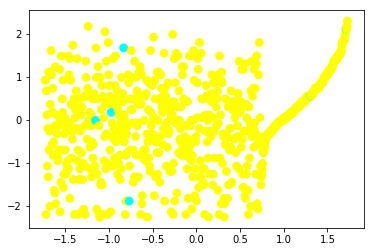

In [91]:
# ComputDBSCAN
from collections import Counter 

modelD = DBSCAN(eps=5, min_samples=10).fit(stdDatosF)
traininglabelsD = modelD.labels_
print (traininglabelsD)
    
        #obtenemos las etiquetas despues del entrenamiento
labelsD = modelD.labels_
labelsD = modelD.fit_predict(stdDatosF)
#print ('Clusters ')
#print (labelsD)

n_clusters_ = len(set(labelsD)) - (1 if -1 in labelsD else 0)
n_noise_ = list(labelsD).count(-1)


        
print ('The Silhouette Coefficient is: %s' % silhouette_score(stdDatosF, traininglabelsD))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

graficar(stdDatosF,labelsD)
#graficar3D(stdDatosF,labelsD)



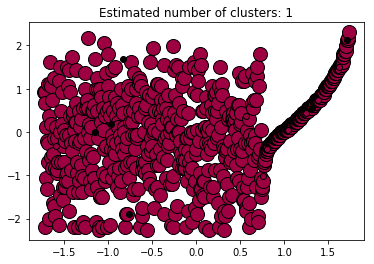

In [92]:
core_samples_mask = np.zeros_like(modelD.labels_, dtype=bool)
core_samples_mask[modelD.core_sample_indices_] = True
unique_labels = set(labelsD)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labelsD == k)

    xy = stdDatosF[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = stdDatosF[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()